Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 5933.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Sto

C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


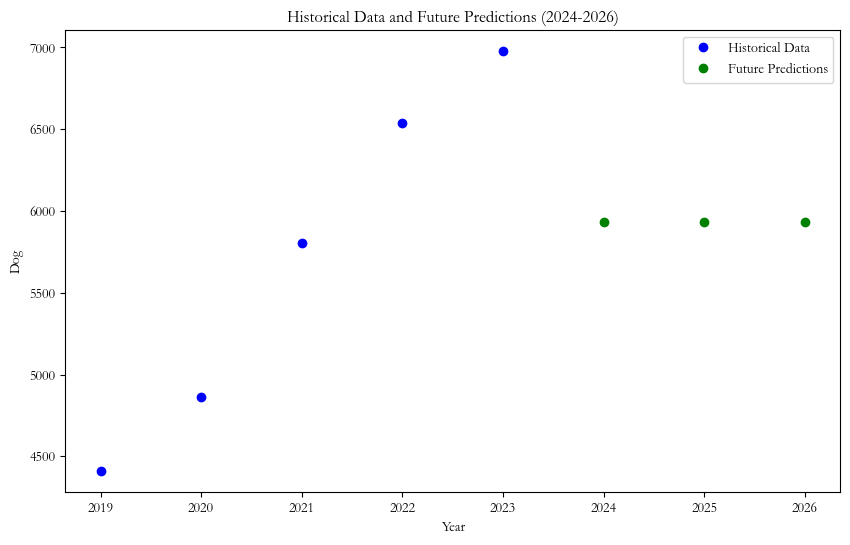

In [3]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# Step 1: 创建数据集
data = pd.DataFrame({
    "Years": [2019, 2020, 2021, 2022, 2023],
    "Dog": [4412, 4862, 5806, 6536, 6980]
})

# 特征和目标
X = data[["Years"]]
y = data["Dog"]

# Step 2: 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: 创建 LightGBM 回归器
model = lgb.LGBMRegressor(objective="regression", random_state=42)

# Step 4: 定义超参数空间
param_dist = {
    "num_leaves": [31, 50, 70, 100, 150],
    "max_depth": [-1, 5, 10, 15, 20],
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200, 300, 400],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 0.5, 1, 10],  # L1 regularization
    "reg_lambda": [0, 0.01, 0.1, 0.5, 1],   # L2 regularization
    "min_child_samples": [5, 10, 20, 50, 100]  # Minimum number of samples per leaf
}

# Step 5: 使用 RandomizedSearchCV 调参
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,  # Number of combinations to try
    scoring='neg_root_mean_squared_error',  # For regression, use RMSE
    n_jobs=-1,
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

# 输出最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Step 6: 使用最佳参数训练模型
best_model = random_search.best_estimator_

# 预测与评估
y_pred = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Final RMSE:", final_rmse)

# Step 8: 未来三年预测
future_years = pd.DataFrame({"Years": [2024, 2025, 2026]})
future_predictions = best_model.predict(future_years)

# 输出未来三年预测值
print("Future Predictions (2024-2026):")
for year, prediction in zip(future_years['Years'], future_predictions):
    print(f"Year {year}: {prediction:.2f}")

# Step 9: 可视化未来三年预测
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Dog'], 'bo', label='Historical Data')
plt.plot(future_years['Years'], future_predictions, 'go', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Dog')
plt.legend()
plt.title("Historical Data and Future Predictions (2024-2026)")
plt.show()
